Dataset - Boston Housing

In [3]:
import numpy as np

In [4]:
from tensorflow.keras.datasets import boston_housing

In [5]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [6]:
X_train.shape

(404, 13)

In [7]:
X_test.shape

(102, 13)

In [8]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [9]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [13]:
X_test

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=100, activation='relu'))
# model.add(Dense(input_dim=X_train.shape[1], units=50, activation='relu'))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [18]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
11/11 [==============================] - 3s 22ms/step - loss: 557.1730 - mae: 21.9147 - val_loss: 609.2063 - val_mae: 23.0475
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 532.9012 - mae: 21.3854 - val_loss: 585.1005 - val_mae: 22.5338
Epoch 3/20
11/11 [==============================] - 0s 6ms/step - loss: 509.3247 - mae: 20.8655 - val_loss: 560.5905 - val_mae: 22.0077
Epoch 4/20
11/11 [==============================] - 0s 6ms/step - loss: 486.2475 - mae: 20.3399 - val_loss: 535.8640 - val_mae: 21.4625
Epoch 5/20
11/11 [==============================] - 0s 7ms/step - loss: 461.9990 - mae: 19.7867 - val_loss: 509.6354 - val_mae: 20.8769
Epoch 6/20
11/11 [==============================] - 0s 7ms/step - loss: 436.3251 - mae: 19.1894 - val_loss: 481.8866 - val_mae: 20.2395
Epoch 7/20
11/11 [==============================] - 0s 8ms/step - loss: 410.0367 - mae: 18.5537 - val_loss: 453.0820 - val_mae: 19.5479
Epoch 8/20
11/11 [=============================

In [20]:
from matplotlib import pyplot as plt

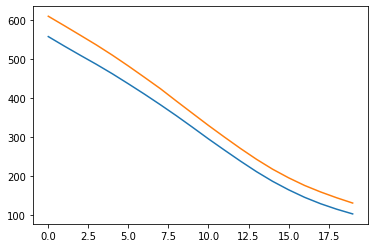

In [21]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

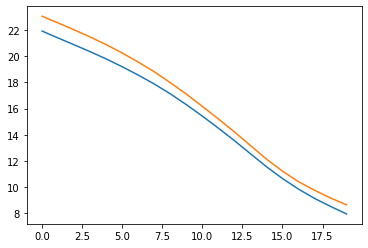

In [22]:
plt.plot(history.epoch, history.history['mae'])
plt.plot(history.epoch, history.history['val_mae'])

In [23]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 113.3174 - mae: 8.8532


[113.3174057006836, 8.853187561035156]

In [24]:
model.save('models/boston.hdf5')
# model.save_weight()

In [25]:
from tensorflow.keras.models import load_model

In [26]:
old_model = load_model('models/boston.hdf5')

In [27]:
x_new = np.random.rand(X_train.shape[1])
x_new = x_new.reshape(1, -1)
x_new.shape
# Za nove podatke koristi se predict tako da se dobije predvidjena vrednost za y
old_model.predict(x_new)

array([[5.2812877]], dtype=float32)